In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=e5b7cc22fc22705292bc592a6467ebeaeb508f043a14373d03fa8bf4fc223138
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Project").getOrCreate()

In [3]:


# Read data
file_location = "OnlineRetail.csv"
file_type = "csv"
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df = spark.read.format(file_type)\
.option("inferSchema", infer_schema)\
.option("header", first_row_is_header)\
.option("sep", delimiter)\
.load(file_location)

# Print Metadata
df.printSchema()



root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [4]:
#  Count data
df.count()
print('The total number of records '+str(df.count()))

The total number of records 541909


In [5]:
df.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [6]:
from pyspark.sql.functions import to_date, split, col


# Separate date and time components
df = df.withColumn("OrderDate", split(col("InvoiceDate"), " ")[0])
df = df.withColumn("OrderTime", split(col("InvoiceDate"), " ")[1])

# Alternatively, if you want to keep the date and time together as a string
df = df.withColumn("OrderDateTime", col("InvoiceDate").cast("string"))

In [7]:
df.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+---------+---------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|OrderDate|OrderTime| OrderDateTime|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+---------+---------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|12/1/2010|     8:26|12/1/2010 8:26|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|12/1/2010|     8:26|12/1/2010 8:26|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|12/1/2010|     8:26|12/1/2010 8:26|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|12/1/2010|     8:26|12/1/2010 8:26|
|   536365|   84029E|RED WOOLLY HO

In [8]:
df.printSchema() # Prints Schema of the dataframe attributes in a tree format


root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- OrderDate: string (nullable = true)
 |-- OrderTime: string (nullable = true)
 |-- OrderDateTime: string (nullable = true)



In [9]:
df = df.dropna()


In [10]:
import pyspark.sql.functions as F


In [11]:

# Calculate the new column "Value"
df = df.withColumn("Value", F.round(col("Quantity") * col("UnitPrice"),2))

# Show the dataframe
df.show()


+---------+---------+--------------------+--------+--------------+---------+----------+--------------+---------+---------+--------------+-----+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|OrderDate|OrderTime| OrderDateTime|Value|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+---------+---------+--------------+-----+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|12/1/2010|     8:26|12/1/2010 8:26| 15.3|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|12/1/2010|     8:26|12/1/2010 8:26|20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|12/1/2010|     8:26|12/1/2010 8:26| 22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|12/1/2010|     8:26|12/1/2010 8:26

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, max, min, count, sum
from pyspark.sql.window import Window


In [13]:
rfm = df.groupBy("CustomerID").agg(
    max(col("InvoiceDate")).alias("Recent_date"),
    count(col("InvoiceNo")).alias("Frequency"),
    F.round(sum(col("Value")).alias("Monetary"),2)
)

In [14]:
rfm = rfm.withColumnRenamed("round(sum(Value) AS Monetary, 2)", "Monetary")


In [15]:
rfm.show()


+----------+---------------+---------+--------+
|CustomerID|    Recent_date|Frequency|Monetary|
+----------+---------------+---------+--------+
|     12346|1/18/2011 10:17|        2|     0.0|
|     12347|  8/2/2011 8:48|      182|  4310.0|
|     12348|9/25/2011 13:13|       31| 1797.24|
|     12349|11/21/2011 9:51|       73| 1757.55|
|     12350| 2/2/2011 16:01|       17|   334.4|
|     12352|9/28/2011 14:58|       95| 1545.41|
|     12353|5/19/2011 17:47|        4|    89.0|
|     12354|4/21/2011 13:11|       58|  1079.4|
|     12355| 5/9/2011 13:49|       13|   459.4|
|     12356| 4/8/2011 12:33|       59| 2811.43|
|     12357|11/6/2011 16:07|      131| 6207.67|
|     12358|7/12/2011 10:04|       19| 1168.06|
|     12359| 6/3/2011 12:26|      254| 6245.53|
|     12360|8/19/2011 10:10|      129| 2662.06|
|     12361|2/25/2011 13:51|       10|   189.9|
|     12362|9/28/2011 12:04|      274| 5154.58|
|     12363|8/22/2011 10:18|       23|   552.0|
|     12364|9/22/2011 16:07|       85|  

In [16]:
rfm_d = rfm.toPandas()
from pyspark.sql.functions import current_date
current_date_value = current_date()

In [17]:
import pandas as pd

# Assuming you have a pandas DataFrame named rfm
rfm_d['Recent_date'] = pd.to_datetime(rfm_d['Recent_date'])  # Convert column to datetime if not already
rfm_d['Recency'] = (pd.to_datetime('2012-01-01') - rfm_d['Recent_date']).dt.days
rfm_d.head(5)

,CustomerID,Recent_date,Frequency,Monetary,Recency
0,12346,2011-01-18 10:17:00,2,0.00,347
1,12347,2011-08-02 08:48:00,182,4310.00,151
2,12348,2011-09-25 13:13:00,31,1797.24,97
3,12349,2011-11-21 09:51:00,73,1757.55,40
4,12350,2011-02-02 16:01:00,17,334.40,332


<ipython-input-18-f1e6c074a878>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_d['Recency'])
<ipython-input-18-f1e6c074a878>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_d['Frequency'])
<ipython-input-18-f1e6c074a878>:16: UserWarning: 

`distplot` is a deprecated function and wil

<Axes: xlabel='Monetary', ylabel='Density'>

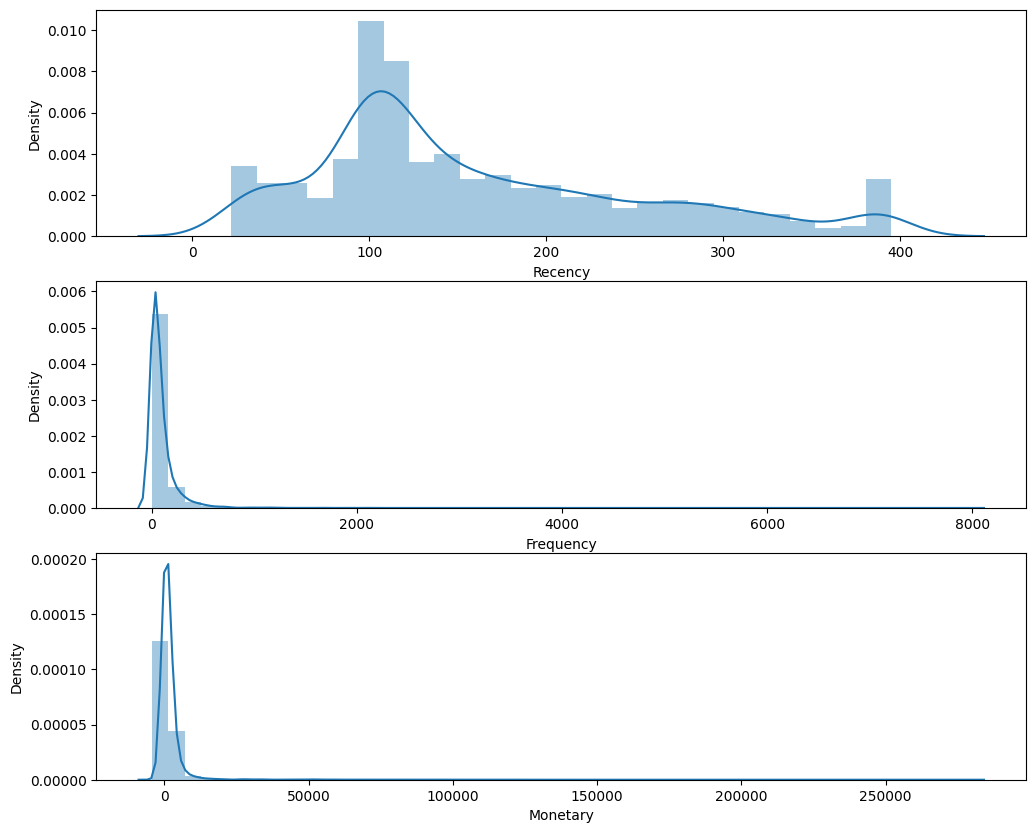

In [18]:
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession


import seaborn as sns
plt.figure(figsize=(12,10))
# Plot distribution of recency
plt.subplot(3, 1, 1)
sns.distplot(rfm_d['Recency'])
# Plot distribution of frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm_d['Frequency'])
# Plot distribution of monetary
plt.subplot(3, 1, 3)
sns.distplot(rfm_d['Monetary'])

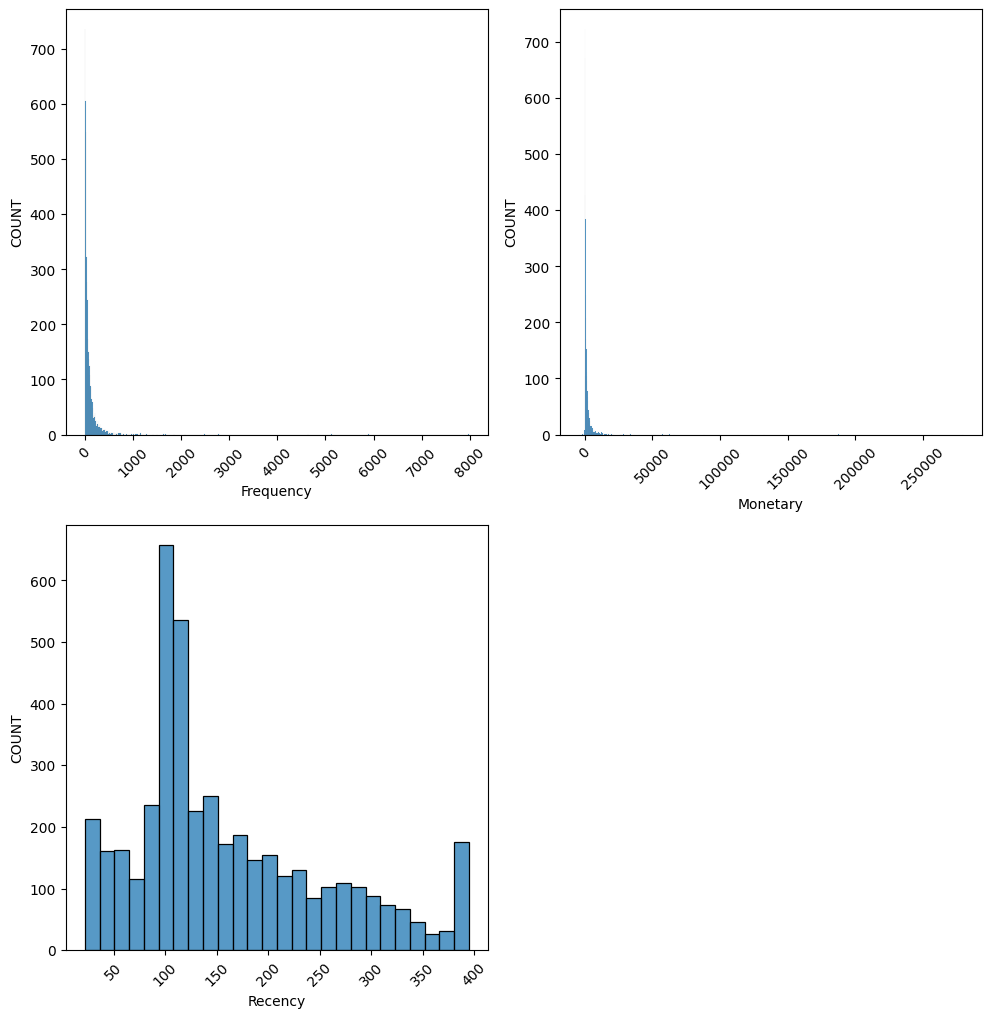

In [19]:
fig = plt.figure(figsize=(10,20))
num_vars = rfm_d.select_dtypes(['int64', 'float64']).columns.tolist()
#num_vars.remove('Id')
for index, col in enumerate(num_vars):
    plt.subplot(4,2,index+1)
    sns.histplot(x=col, data=rfm_d)
    plt.ylabel('COUNT', size = 10)
    plt.xlabel(col, fontsize = 10)
    plt.xticks(size = 10, rotation = 45 )
    plt.yticks(size = 10)
fig.tight_layout(pad=1.0)

In [20]:
rfm_d.drop(rfm_d[rfm_d['Frequency'] >= 500].index, inplace = True)

In [21]:
rfm_d.drop(rfm_d[rfm_d['Monetary'] >= 10000].index, inplace = True)

In [22]:
rfm_d.drop(rfm_d[rfm_d['Monetary'] <= 0].index, inplace = True)

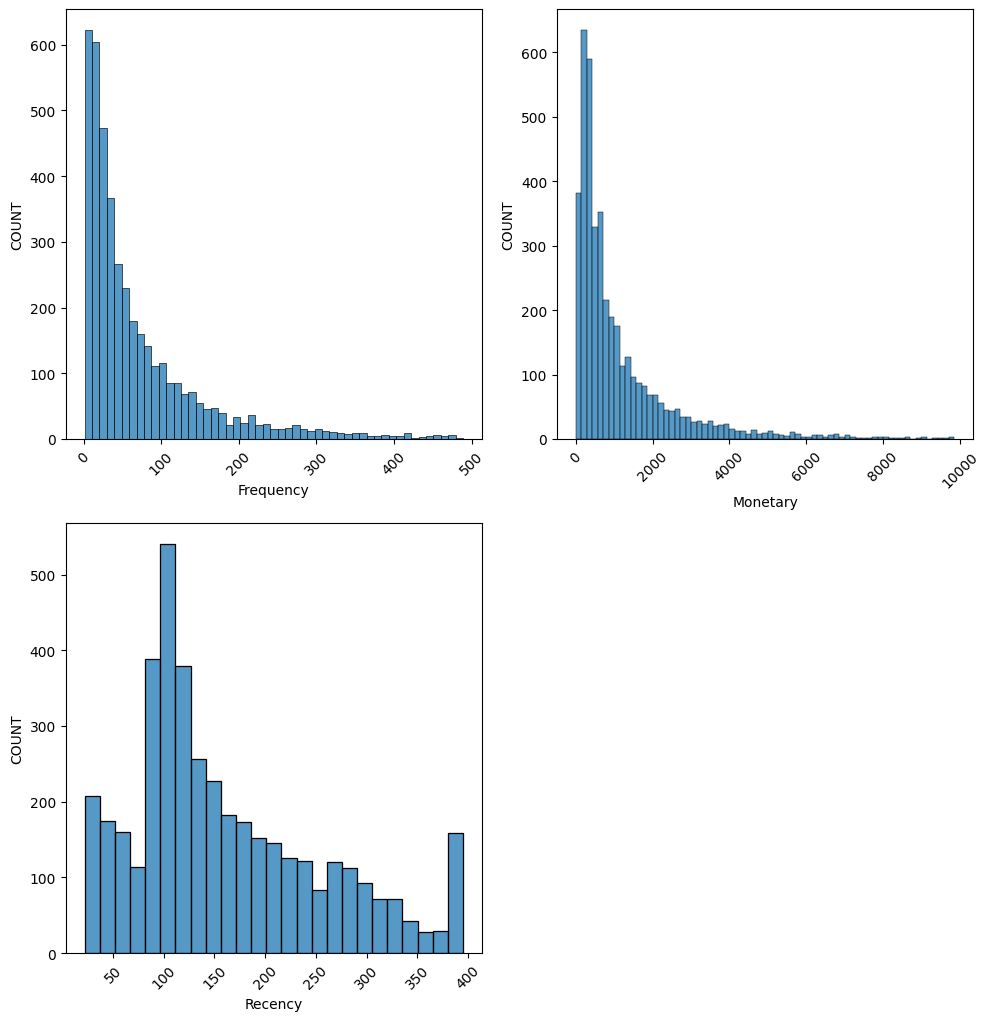

In [23]:
fig = plt.figure(figsize=(10,20))
num_vars = rfm_d.select_dtypes(['int64', 'float64']).columns.tolist()
#num_vars.remove('Id')
for index, col in enumerate(num_vars):
    plt.subplot(4,2,index+1)
    sns.histplot(x=col, data=rfm_d)
    plt.ylabel('COUNT', size = 10)
    plt.xlabel(col, fontsize = 10)
    plt.xticks(size = 10, rotation = 45 )
    plt.yticks(size = 10)
fig.tight_layout(pad=1.0)

In [24]:

from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.evaluation import ClusteringEvaluator

In [25]:
rfmd=rfm_d
rfmd.dropna()

,CustomerID,Recent_date,Frequency,Monetary,Recency
1,12347,2011-08-02 08:48:00,182,4310.00,151
2,12348,2011-09-25 13:13:00,31,1797.24,97
3,12349,2011-11-21 09:51:00,73,1757.55,40
4,12350,2011-02-02 16:01:00,17,334.40,332
5,12352,2011-09-28 14:58:00,95,1545.41,94
...,...,...,...,...,...
4366,18278,2011-09-27 11:58:00,9,173.90,95
4367,18280,2011-03-07 09:52:00,10,180.60,299
4368,18281,2011-06-12 10:53:00,7,80.82,202
4369,18282,2011-08-09 15:10:00,13,176.60,144


In [26]:
rfm_col = ["Recency", "Frequency", "Monetary"]
assembler = VectorAssembler().setHandleInvalid("skip").setInputCols(rfm_col).setOutputCol("unscaled_features")
scaler = StandardScaler().setInputCol("unscaled_features").setOutputCol("features")

In [27]:

import pyspark.sql.functions as F
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

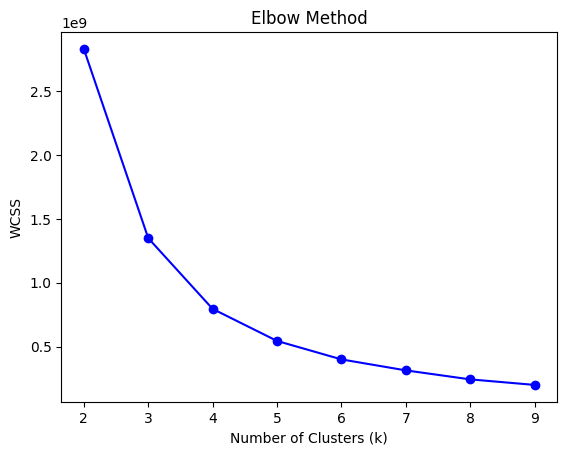

+-------+---------+--------+----------+
|Recency|Frequency|Monetary|prediction|
+-------+---------+--------+----------+
|  151.0|    182.0|  4310.0|         5|
|   97.0|     31.0| 1797.24|         2|
|   40.0|     73.0| 1757.55|         2|
|  332.0|     17.0|   334.4|         1|
|   94.0|     95.0| 1545.41|         2|
|  226.0|      4.0|    89.0|         1|
|  254.0|     58.0|  1079.4|         8|
|  236.0|     13.0|   459.4|         4|
|  267.0|     59.0| 2811.43|         7|
|   55.0|    131.0| 6207.67|         6|
|  172.0|     19.0| 1168.06|         8|
|  211.0|    254.0| 6245.53|         6|
|  134.0|    129.0| 2662.06|         7|
|  309.0|     10.0|   189.9|         1|
|   94.0|    274.0| 5154.58|         5|
|  131.0|     23.0|   552.0|         4|
|  100.0|     85.0|  1313.1|         8|
|  313.0|     23.0|  320.69|         1|
|   26.0|     11.0|   168.9|         1|
|  296.0|    167.0| 3545.69|         0|
+-------+---------+--------+----------+
only showing top 20 rows

[ 134.12021858

In [28]:

# Assuming you have a DataFrame with RFM data
# rfmdf = spark.read.csv("rfm_data.csv", header=True, inferSchema=True)
# Convert the Pandas DataFrame to PySpark DataFrame
rfmdf = spark.createDataFrame(rfmd)
# Preprocess RFM data and create feature vector
rfmdf = rfmdf.withColumn("Recency", rfmdf["Recency"].cast("double"))
rfmdf = rfmdf.withColumn("Frequency", rfmdf["Frequency"].cast("double"))
rfmdf = rfmdf.withColumn("Monetary", rfmdf["Monetary"].cast("double"))
assembler = VectorAssembler(
    inputCols=["Recency", "Frequency", "Monetary"],
    outputCol="features"
)
rfmdf = assembler.transform(rfmdf)

# Standardize the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scalerModel = scaler.fit(rfmdf)
scaledData = scalerModel.transform(rfmdf)

k_values = range(2, 10)
wcss = []

for k in k_values:
    kmeans = KMeans(k=k, seed=42)
    model = kmeans.fit(scaledData)
    cost = model.summary.trainingCost
    wcss.append(cost)

# Plot the WCSS values
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


# # Apply k-means clustering
# k = 4  # Number of clusters
# kmeans = KMeans(k=k, seed=42)
# model = kmeans.fit(scaledData)


# Assign cluster labels to the data
predictions = model.transform(scaledData)

# View the cluster assignments
predictions.select("Recency", "Frequency", "Monetary", "prediction").show()

# Get the cluster centers
centers = model.clusterCenters()
for center in centers:
    print(center)


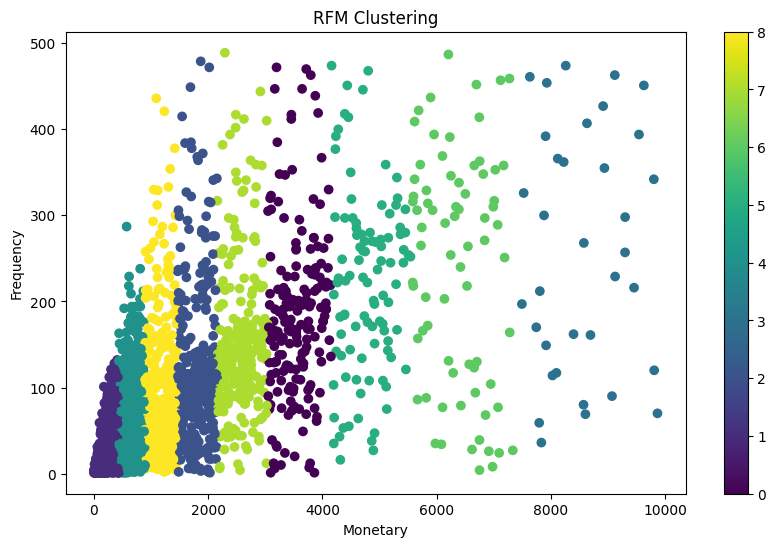

In [29]:


# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = predictions.select("Recency", "Frequency", "Monetary", "prediction").toPandas()

# Plotting the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pandas_df["Monetary"], pandas_df["Frequency"], c=pandas_df["prediction"], cmap="viridis")
plt.xlabel("Monetary")
plt.ylabel("Frequency")
plt.title("RFM Clustering")
plt.colorbar(scatter)
plt.show()

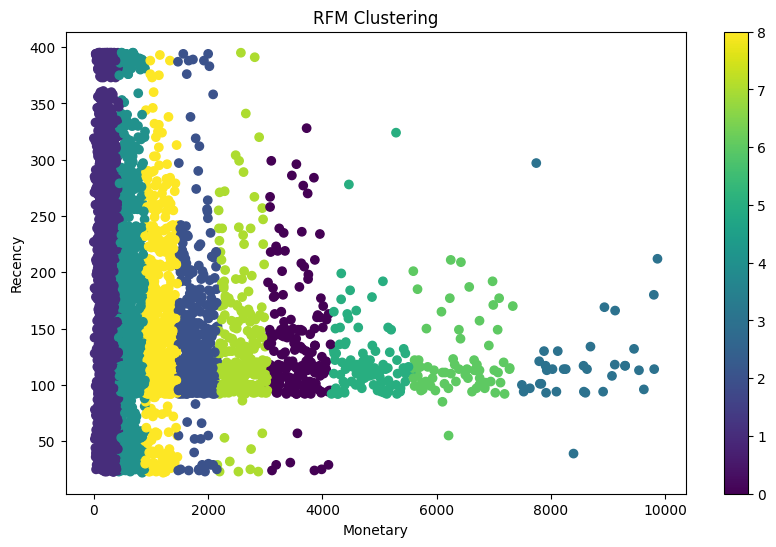

In [30]:

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = predictions.select("Recency", "Frequency", "Monetary", "prediction").toPandas()

# Plotting the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pandas_df["Monetary"], pandas_df["Recency"], c=pandas_df["prediction"], cmap="viridis")
plt.xlabel("Monetary")
plt.ylabel("Recency")
plt.title("RFM Clustering")
plt.colorbar(scatter)
plt.show()